In [1]:
import pandas as pd
from pathlib import Path
from zipfile import ZipFile
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#----------------------------- Problem 1 ----------------------------------#

In [3]:

file_name = "kaggle-survey.zip"

# find the path of this directory
directory = Path("Kaggle")
# make a new directory called "Kaggle"
directory.mkdir()

# extract all files in the zip files and store them to Klaggle
with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    print('Extracting all the files now!! Yay :D!')
    zip.extractall('')
    print('Finish extracting the mother file! Yay! :D!')
    files = os.listdir(Path('kaggle-survey'))
    for file in files:
        if file.endswith('.zip'):
            with ZipFile(Path('kaggle-survey') / file, 'r') as zip:
                zip.extractall(directory)
                print('Finish extracting the children files! Yay! :D!')

File Name                                             Modified             Size
kaggle-survey/                                 2022-02-21 00:28:04            0
kaggle-survey/kaggle-survey-2019.zip           2022-02-20 22:13:42      1898538
kaggle-survey/kaggle-survey-2020.zip           2022-02-20 22:14:22      2179679
kaggle-survey/kaggle-survey-2021.zip           2022-02-20 22:15:02      3160342
Extracting all the files now!! Yay :D!
Finish extracting the mother file! Yay! :D!
Finish extracting the children files! Yay! :D!
Finish extracting the children files! Yay! :D!
Finish extracting the children files! Yay! :D!


In [4]:
############################## Problem 2 ###################################

In [5]:
############################################################################
######## Step 1 - Loading the csv files and store them to dataframe ########
############################################################################

# open survey 2020 and store it as a dataframe
file2020 = Path('Kaggle') / 'kaggle_survey_2020_responses.csv'
df0 = pd.read_csv(file2020,skiprows=1)
# open survey 2021 and store it as a dataframe
file2021 = Path('Kaggle') / 'kaggle_survey_2021_responses.csv'
df1 = pd.read_csv(file2021,skiprows=1)
# open 2019 multiple choice file and store it as a dataframe
file2019_m = Path('Kaggle') / 'multiple_choice_responses.csv'
df9= pd.read_csv(file2019_m,skiprows=1)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (195,201) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
#######################################################################################################################
################## Step 2 - Find out questions with different wordings in all three surveys ###########################
##                          And map questions that are the same but with different wordings in all three surveys 
#######################################################################################################################

# Store surveys to sets and only leave the question part (the rest is the option part)
set2020 = set([i.split('-')[0].strip() for i in df0.columns])
set2019 = set([i.split('-')[0].strip() for i in df9.columns])
# get the disjunctive union between 2020 questions and 2019 questions
union = set2020.union(set2019)
intersection = set2020.intersection(set2019)
disjunctive_union = union - intersection
# for i in disjunctive_union:
#     print(i)

In [7]:
# find out the questions with different wording in 2020 survy
intersec2020 = disjunctive_union.intersection(set2020)
# for i in intersec2020:
#     print(i)

In [8]:
# find out the questions with different wording in 2019 survy
intersec2019 = disjunctive_union.intersection(set2019)
# for i in intersec2019:
#     print(i)

In [9]:
# Mapping questions that are the same but with different wordings in 2019 survey

mapping2019 = {
    'How long have you been writing code to analyze data (at work or at school)?': 'For how many years have you been writing code and/or programming?',
    'Which categories of ML tools do you use on a regular basis?  (Select all that apply)': 'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)',
    'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?':'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?',
    'Which specific big data / analytics products do you use on a regular basis? (Select all that apply)':'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)',
    'Which of the following relational database products do you use on a regular basis? (Select all that apply)':'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)',
    'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)':'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)',
    'Which specific cloud computing products do you use on a regular basis? (Select all that apply)':'Do you use any of the following cloud computing products on a regular basis? (Select all that apply)',
    'Have you ever used a TPU (tensor processing unit)?':'Approximately how many times have you used a TPU (tensor processing unit)?',
    'Which of the following machine learning products do you use on a regular basis? (Select all that apply)':'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply)'
}

q9 = df9.columns
for i in q9:
    if '-' in i:
        if i.split('-')[0].strip() in mapping2019:
            start, rest = i.split('-',1)
            df9.rename(columns={i: mapping2019[start.strip()] + ' -' + rest}, inplace=True)
    
    else:
        if i in mapping2019:
            df9.rename(columns={i: mapping2019[i]}, inplace=True)
            
      


In [10]:
# Mapping questions that are the same but with different wordings in 2020 survey
mapping2020 = {
    'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)':'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)',
    'Do you use any of the following machine learning products on a regular basis? (Select all that apply)':'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply)',
    'In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply)':'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply)',
    'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)':'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)':'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)',
    'In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)':'Do you use any of the following cloud computing products on a regular basis? (Select all that apply)',
    'Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?':'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)'
}
q0 = df0.columns
for i in q0:
    if '-' in i:
        if i.split('-')[0].strip() in mapping2020:
            start, rest = i.split('-',1)
            df0.rename(columns={i: mapping2020[start.strip()] + ' -' + rest}, inplace=True)
    
    else:
        if i in mapping2020:
            df0.rename(columns={i: mapping2020[i]}, inplace=True)

In [11]:
# drop(delete) some 2020 survey questions that doesn't exist in all three surveys
drop0 =['In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)',
'Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)',
'What type of computing platform do you use most often for your data science projects?',
'Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)',
'Which of the following business intelligence tools do you use most often?',
'Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?',
'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
'Do you use any tools to help manage machine learning experiments? (Select all that apply)']

for i in q0:
    if '-' in i:
        if i.split('-')[0].strip() in drop0:
            df0.drop(i, axis=1, inplace=True)
    
    else:
        if i in drop0:
            df0.drop(i, axis=1, inplace=True)




In [12]:
set2020 = set([i.split('-')[0].strip() for i in df0.columns])
set2021 = set([i.split('-')[0].strip() for i in df1.columns])

In [13]:
# get the disjunctive union between 2020 questions and 2021 questions
union = set2021.union(set2020)
intersection = set2021.intersection(set2020)
disjunctive_union = union - intersection
# for i in disjunctive_union:
#     print(i)

In [14]:
# find out the questions with different wording in 2020 survy
intersec2020 = disjunctive_union.intersection(set2020)
# for i in intersec2020:
#     print(i)

In [15]:
# Mapping questions that are the same but with different wordings in 2021 survey
mapping2021 = {
    'In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply)':'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply)',
    'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)':'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)',
    'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)':'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)',
    'In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)':'Do you use any of the following cloud computing products on a regular basis? (Select all that apply)',
    'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)':'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)',
    'Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?':'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)'
    
}
q1 = df1.columns


for i in q1:
    if '-' in i:
        if i.split('-')[0].strip() in mapping2021:
            start, rest = i.split('-',1)
            df1.rename(columns={i: mapping2021[start.strip()] + ' -' + rest}, inplace=True)
    
    else:
        if i in mapping2021:
            df1.rename(columns={i: mapping2021[i]}, inplace=True)

In [16]:
# compare 2021survey and 2020survey, find out questions that only exit in 2021 survey
intersec2021 = disjunctive_union.intersection(set2021)
drop1 = []
for i in intersec2021:
    drop1.append(i)

In [17]:
q1 = df1.columns
# drop(delete) some 2021survey questions that only exit in 2021 survey
for i in q1:
    if '-' in i:
        if i.split('-')[0].strip() in drop1:
            df1.drop(i, axis=1, inplace=True)
    
    else:
        if i in drop1:
            df1.drop(i, axis=1, inplace=True)

In [18]:
# checking whether there are still questions in all three surveys that are not the same
# set2020 = set([i.split('-')[0].strip() for i in df0.columns])
# set2019 = set([i.split('-')[0].strip() for i in df9.columns])
# set2021 = set([i.split('-')[0].strip() for i in df1.columns])
# union = set2021.union(set2020, set2019)
# intersection = set2021.intersection(set2020, set2019)
# disjunctive_union = union - intersection

In [19]:
################################################################################################################
################## Step 3 - Add 'year of the answer' column in each year's dataframe ###########################
################################################################################################################

df0['year of the answer'] = 2020
df9['year of the answer'] = 2019
df1['year of the answer'] = 2021

In [20]:
################################################################################################################
################## Step 4 - Implement some data cleaning in preperation for next step ##########################
################################################################################################################

# delete all columns in 2019 that have other text value.
text_9 = df9.filter(like='- Text').columns
df9.drop(text_9, axis=1, inplace=True)


In [21]:
# delete empty space string at the end of some columns strings 
col0 = df0.columns
for i in col0:
    if i[-1] == ' ':
        df0.rename(columns={i: i[:-1]}, inplace=True)
col1 = df1.columns
for i in col1:
    if i[-1] == ' ':
        df1.rename(columns={i: i[:-1]}, inplace=True)
        
col9 = df9.columns
for i in col9:
    if i[-1] == ' ':
        df9.rename(columns={i: i[:-1]}, inplace=True)

In [22]:
####################################################################################################
################## Step 5 - Clean up option selections in different years ##########################
####################################################################################################
# There are 17 questions that needs clean up

# Clean up strategy: 1. Rename all options in the same questions that not exist in all three years survey to 'Other' option
#                    2. Rename all options in the same questions that express the same things but with different wording to the same wording
#                    3. Rename all questions that have misspelling or wierd formatting

# Main goal is to make every questions the same in all three dataframe for easier merging in the last step :D

q9 = df9.filter(like='On which platforms have you begun or completed data science courses? (Select all that apply)').columns
q0 = df0.filter(like='On which platforms have you begun or completed data science courses? (Select all that apply)').columns
q1 = df1.filter(like='On which platforms have you begun or completed data science courses? (Select all that apply)').columns


df9.rename(columns={'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Courses (i.e. Kaggle Learn)': 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses'}, inplace=True)
other = 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other'
df9.rename(columns={'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataQuest': other}, inplace=True)




In [23]:
q9 = set(df9.filter(like='What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)').columns)
q0 = set(df0.filter(like='What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)').columns)
q1 = set(df1.filter(like='What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)').columns)

df0.rename(columns={'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  D3 js': 'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  D3.js'}, inplace=True)
df1.rename(columns={'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  D3 js': 'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  D3.js'}, inplace=True)


In [24]:
q9 = set(df9.filter(like='Which of the following ML algorithms do you use on a regular basis? (Select all that apply)').columns)
q0 = set(df0.filter(like='Which of the following ML algorithms do you use on a regular basis? (Select all that apply)').columns)
q1 = set(df1.filter(like='Which of the following ML algorithms do you use on a regular basis? (Select all that apply)').columns)

df9.rename(columns={'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Transformer Networks (BERT, gpt-2, etc)': 'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Transformer Networks (BERT, gpt-3, etc)'}, inplace=True)



In [25]:
q9 = set(df9.filter(like='Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice').columns)
q0 = set(df0.filter(like='Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice').columns)
q1 = set(df1.filter(like='Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice').columns)

df9.rename(columns={'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  IBM Cloud': 'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat'}, inplace=True)
df9.rename(columns={'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Red Hat Cloud': 'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat'}, inplace=True)
df0.rename(columns={'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Tencent Cloud': 'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other'}, inplace=True)
df1.rename(columns={'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Tencent Cloud': 'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other'}, inplace=True)



In [26]:
q9 = set(df9.filter(like='Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)').columns)
q0 = set(df0.filter(like='Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)').columns)
q1 = set(df1.filter(like='Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)').columns)

other = 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'


df0.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Databricks Collaborative Notebooks': other}, inplace=True)
df0.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Datalab Notebooks': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud Notebook Products (AI Platform, Datalab, etc)'}, inplace=True)
df0.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud AI Platform Notebooks': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud Notebook Products (AI Platform, Datalab, etc)'}, inplace=True)
df0.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Amazon EMR Notebooks': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc)'}, inplace=True)
df0.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc)'}, inplace=True)
df0.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Code Ocean':'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Code Ocean'}, inplace=True)

df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Code Ocean':'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Code Ocean'}, inplace=True)
df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Databricks Collaborative Notebooks': other}, inplace=True)
df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Datalab': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud Notebook Products (AI Platform, Datalab, etc)'}, inplace=True)
df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Notebooks (AI Platform / Vertex AI)': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud Notebook Products (AI Platform, Datalab, etc)'}, inplace=True)
df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Amazon EMR Notebooks': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc)'}, inplace=True)
df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio Notebooks': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc)'}, inplace=True)

df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Zeppelin / Zepl Notebooks': other}, inplace=True)
df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Deepnote Notebooks': other}, inplace=True)
df1.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Observable Notebooks': other}, inplace=True)

df9.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Colab': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Colab Notebooks'}, inplace=True)
df9.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks (Kernels)': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks'}, inplace=True)
df9.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Microsoft Azure Notebooks': 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Azure Notebooks'}, inplace=True)

df9.rename(columns={'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  FloydHub': other}, inplace=True)




In [27]:
q9 = set(df9.filter(like='Which of the following integrated development environments (IDE').columns)
q0 = set(df0.filter(like='Which of the following integrated development environments (IDE').columns)
q1 = set(df1.filter(like='Which of the following integrated development environments (IDE').columns)



df1.rename(columns={"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Jupyter Notebook":"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)"}, inplace=True)
df0.rename(columns={"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio / Visual Studio Code":"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio / Visual Studio Code"},inplace=True)
df0.rename(columns={"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Click to write Choice 13":"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio / Visual Studio Code"},inplace=True)

df9.rename(columns={"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Atom":"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other"}, inplace=True)
df1.rename(columns={"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio":"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio / Visual Studio Code"},inplace=True)
df1.rename(columns={"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode)":"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio / Visual Studio Code"},inplace=True)



In [28]:
q9 = set(df9.filter(like='Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice').columns)
q0 = set(df0.filter(like='Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice').columns)
q1 = set(df1.filter(like='Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice').columns)

other = 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - Other'
df1.rename(columns={'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch Lightning':'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch'},inplace=True)
df1.rename(columns={'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Huggingface':other}, inplace=True)

df9.rename(columns={'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  RandomForest':other}, inplace=True)
df9.rename(columns={'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Spark MLib':other}, inplace=True)

to_change=['CatBoost', 'H2O 3', 'JAX', 'MXNet', 'Prophet', 'Tidymodels']

for i in q0:
    for j in to_change:
        if j in i:
            df0.rename(columns={i:other}, inplace=True)
for i in q1:
    for j in to_change:
        if j in i:
            df1.rename(columns={i:other}, inplace=True)


In [29]:
q9 = set(df9.filter(like='Which of the following natural language processing (NLP) methods do you use on a regular basis?').columns)
q0 = set(df0.filter(like='Which of the following natural language processing (NLP) methods do you use on a regular basis?').columns)
q1 = set(df1.filter(like='Which of the following natural language processing (NLP) methods do you use on a regular basis?').columns)

df9.rename(columns={'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Transformer language models (GPT-2, BERT, XLnet, etc)':'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Transformer language models (GPT-3, BERT, XLnet, etc)'},inplace=True)



In [30]:
q9 = set(df9.filter(like='Which types of specialized hardware do you use on a regular basis?  (Select all that apply)').columns)
q0 = set(df0.filter(like='Which types of specialized hardware do you use on a regular basis?  (Select all that apply)').columns)
q1 = set(df1.filter(like='Which types of specialized hardware do you use on a regular basis?  (Select all that apply)').columns)

other = 'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'
df9.rename(columns={'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - CPUs':other},inplace=True)
df9.rename(columns={'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - None / I do not know':'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - None'},inplace=True)
df1.rename(columns={'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  AWS Inferentia Chips':other},inplace=True)
df1.rename(columns={'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  AWS Trainium Chips':other},inplace=True)
df1.rename(columns={'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  NVIDIA GPUs':'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - GPUs'}, inplace=True)
df1.rename(columns={'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud TPUs': 'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - TPUs'}, inplace=True)




In [31]:
q9 = set(df9.filter(like='Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)').columns)
q0 = set(df0.filter(like='Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)').columns)
q1 = set(df1.filter(like='Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)').columns)

 
other = 'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Other'

df9.rename(columns={'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - None': 'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - No / None'}, inplace=True)
df0.rename(columns={'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - None': 'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - No / None'}, inplace=True)
df1.rename(columns={'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - None': 'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - No / None'}, inplace=True)

df9.rename(columns={'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)':'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)'},inplace=True)
df9.rename(columns={'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automated hyperparameter tuning (e.g. hyperopt, ray.tune)': 'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)'}, inplace=True)
df1.rename(columns={'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI)':'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)'}, inplace=True)
df0.rename(columns={'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)':'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)'},inplace=True)
df0.rename(columns={'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google Cloud AutoML, H20 Driverless AI)':'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)'},inplace=True)




In [32]:
q9 = set(df9.filter(like='Do you use any of the following cloud computing products on a regular basis? (Select all that apply)').columns)
q0 = set(df0.filter(like='Do you use any of the following cloud computing products on a regular basis? (Select all that apply)').columns)
q1 = set(df1.filter(like='Do you use any of the following cloud computing products on a regular basis? (Select all that apply)').columns)



df9.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - AWS Elastic Compute Cloud (EC2)': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Amazon Elastic Compute Cloud (EC2)'}, inplace=True)
df9.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Google Compute Engine (GCE)': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Compute Engine'}, inplace=True)
df9.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - None': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - No / None'}, inplace=True)
other = 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Other'
tochange_9 = ['AWS Batch','AWS Elastic Beanstalk','AWS Lambda','Azure Container Service','Azure Virtual Machines','Google App Engine','Google Cloud Functions','Google Kubernetes Engine']
for i in q9:
    start, middle, rest = i.split('-',2)
    rest = rest[1:]
    if rest in tochange_9:
        df9.rename(columns={i: other}, inplace=True)



df0.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - None': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - No / None'}, inplace=True)
df0.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Amazon EC2': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Amazon Elastic Compute Cloud (EC2)'}, inplace=True)
df0.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Compute Engine': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Compute Engine'}, inplace=True)
tochange_0 = ['AWS Lambda','Amazon Elastic Container Service','Azure Cloud Services','Azure Functions','Google Cloud App Engine','Google Cloud Functions','Google Cloud Run','Microsoft Azure Container Instances']
for i in q0:
    start, middle, rest = i.split('-',2)
    rest = rest[2:] 
    if rest in tochange_0:
        df0.rename(columns={i: other}, inplace=True)


df1.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Amazon Elastic Compute Cloud (EC2)':'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Amazon Elastic Compute Cloud (EC2)'},inplace=True)
df1.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - None': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - No / None'}, inplace=True)
df1.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Compute Engine': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Compute Engine'}, inplace=True)
df1.rename(columns={'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice -  Microsoft Azure Virtual Machines': 'Do you use any of the following cloud computing products on a regular basis? (Select all that apply) - Selected Choice - Other'}, inplace=True)




In [33]:
q9 = set(df9.filter(like='Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)').columns)
q0 = set(df0.filter(like='Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)').columns)
q1 = set(df1.filter(like='Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)').columns)


other = 'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Other'

df0.rename(columns={'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgresSQL': 'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgreSQL'}, inplace=True)
df9.rename(columns={'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgresSQL': 'Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgreSQL'}, inplace=True)

q9 = set(df9.filter(like='Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)').columns)
q0 = set(df0.filter(like='Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)').columns)
q1 = set(df1.filter(like='Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)').columns)

df9.rename(columns={i: other for i in (q9 - (q0 & q1))}, inplace=True)

df0.rename(columns={i: other for i in (q0 - (q9& q1))}, inplace=True)

df1.rename(columns={i: other for i in (q1 - (q9 & q0))}, inplace=True)



In [34]:
q9 = set(df9.filter(like='Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)').columns)
q0 = set(df0.filter(like='Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)').columns)
q1 = set(df1.filter(like='Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)').columns)

other = 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'
toChange = ['Auto-Keras', 'Auto-Sklearn', 'Auto_ml', 'MLbox', 'Tpot', 'Xcessiv']

for i in q9:
    for j in toChange:
        if j in i:
            df9.rename(columns={i:other}, inplace=True)
df9.rename(columns={'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google AutoML': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud AutoML'}, inplace=True)
# misspelling err
df9.rename(columns={'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  H20 Driverless AI ': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  H2O Driverless AI'}, inplace=True)


for i in q0:
    for j in toChange:
        if j in i:
            df0.rename(columns={i:other}, inplace=True)
# misspelling err
df0.rename(columns={'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  H20 Driverless AI ': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  H2O Driverless AI'}, inplace=True)
df0.rename(columns={'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - No / None': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - None'}, inplace=True)

df1.rename(columns={'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Amazon Sagemaker Autopilot': other}, inplace=True)
df1.rename(columns={'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Azure Automated Machine Learning': other}, inplace=True)
df1.rename(columns={'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - No / None': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - None'}, inplace=True)
df1.rename(columns={'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  H2O Driverless AI ':'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  H2O Driverless AI'}, inplace=True)


In [35]:
# to stay options: Amazon SageMaker, Azure Machine Learning Studio, No / None, Other
q9 = set(df9.filter(like='Do you use any of the following managed machine learning products on a regular basis? (Select all that apply)').columns)
q0 = set(df0.filter(like='Do you use any of the following managed machine learning products on a regular basis? (Select all that apply)').columns)
q1 = set(df1.filter(like='Do you use any of the following managed machine learning products on a regular basis? (Select all that apply)').columns)


df9.rename(columns={'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - None': 'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - No / None'}, inplace=True)
other = 'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Other'

tochange_9 = ['Cloudera','Google Cloud Machine Learning Engine','Google Cloud Natural Language','Google Cloud Speech-to-Text','Google Cloud Translation','Google Cloud Vision','RapidMiner','SAS']
for i in q9:
    start, middle, rest = i.split('-',2)
    rest = rest[1:]
    if rest in tochange_9:
        df9.rename(columns={i: other}, inplace=True)


df0.rename(columns={'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - None': 'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - No / None'}, inplace=True)
df0.rename(columns={'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Amazon SageMaker': 'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Amazon SageMaker'}, inplace=True)
df0.rename(columns={'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Azure Machine Learning Studio': 'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Azure Machine Learning Studio'}, inplace=True)
tochange_0 = ['Amazon Forecast','Amazon Rekognition','Azure Cognitive Services','Google Cloud AI Platform / Google Cloud ML Engine','Google Cloud Natural Language','Google Cloud Video AI','Google Cloud Vision AI']
for i in q0:
    start, middle, rest = i.split('-',2)
    rest = rest[2:]
    if rest in tochange_0:
        df0.rename(columns={i: other}, inplace=True)


df1.rename(columns={'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - None': 'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - No / None'}, inplace=True)
df1.rename(columns={'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Amazon SageMaker':'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Amazon SageMaker'}, inplace=True)
df1.rename(columns={'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Azure Machine Learning Studio':'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice - Azure Machine Learning Studio'}, inplace=True)
tochange_1 = ['Alteryx','DataRobot','Databricks','Dataiku','Google Cloud Vertex AI','Rapidminer']
for i in q1:
    start, middle, rest = i.split('-',2)
    rest = rest[2:]
    if rest in tochange_1:
        df1.rename(columns={i: other}, inplace=True)
        



In [36]:
q9 = set(df9.filter(like='On which platforms have you begun or completed data science courses?').columns)
q0 = set(df0.filter(like='On which platforms have you begun or completed data science courses?').columns)
q1 = set(df1.filter(like='On which platforms have you begun or completed data science courses?').columns)

df0.rename(columns={'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)':'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other'},inplace=True)
df1.rename(columns={'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)':'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other'},inplace=True)


In [37]:
q9 = set(df9.filter(like='What programming languages do you use on a regular basis? (Select all that apply)').columns)
q0 = set(df0.filter(like='What programming languages do you use on a regular basis? (Select all that apply)').columns)
q1 = set(df1.filter(like='What programming languages do you use on a regular basis? (Select all that apply)').columns)

other = 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other'
df9.rename(columns={'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - TypeScript': other}, inplace=True)
df0.rename(columns={'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift': other}, inplace=True)
df0.rename(columns={'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia': other}, inplace=True)
df1.rename(columns={'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift': other}, inplace=True)
df1.rename(columns={'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia': other}, inplace=True)


In [38]:
q9 = set(df9.filter(like='Who/what are your favorite media sources that report on data science topics? (Select all that apply)').columns)
q0 = set(df0.filter(like='Who/what are your favorite media sources that report on data science topics? (Select all that apply)').columns)
q1 = set(df1.filter(like='Who/what are your favorite media sources that report on data science topics? (Select all that apply)').columns)


other = 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other'

df9.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, r/datascience, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)'}, inplace=True)
df9.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)'}, inplace=True)
df9.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)'}, inplace=True)
df9.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)'}, inplace=True)
df9.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, O’Reilly Data Show etc)'}, inplace=True)
df9.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Cloud AI Adventures, Siraj Raval, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)'}, inplace=True)
df9.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (traditional publications, preprint journals, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications'}, inplace=True)
df9.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Hacker News (https://news.ycombinator.com/)': other}, inplace=True)


df0.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, O’Reilly Data Show etc)'}, inplace=True)
df0.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications'}, inplace=True)
df0.rename(columns={"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Email newsletters (Data Elixir, O'Reilly Data & AI, etc)":other},inplace=True)

df1.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, O’Reilly Data Show etc)'}, inplace=True)
df1.rename(columns={'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)': 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications'}, inplace=True)
df1.rename(columns={"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Email newsletters (Data Elixir, O'Reilly Data & AI, etc)":other},inplace=True)


In [39]:
####################################################################################################
################## Step 6 - Combine questions with the same string together ########################
####################################################################################################

# combine 'Other' in 2019 together
df9 = df9.groupby(level=0, axis=1, sort=False).first(min_count=1)
# combine 'Other' in 2020 together
df0 = df0.groupby(level=0, axis=1, sort=False).first(min_count=1)
# combine 'Other' in 2021 together
df1 = df1.groupby(level=0, axis=1, sort=False).first(min_count=1)

In [40]:
#############################################################################################################
################## Step 8 - Merge three dataframe together into the final dataframe #########################
#############################################################################################################
result = pd.concat([df9, df0, df1], ignore_index=True, sort=False)

In [41]:
##############################################################################################################
################## Step 9 - Output the final dataframe to 'Kaggle_survey 2019-2021.csv' ######################
##############################################################################################################

result.to_csv('Kaggle_survey 2019-2021.csv', encoding='utf-8', index=False)

## END OF PROBLEM 2 ##

In [42]:
# ***************************** Problem 3 **********************************#
#**** Things needs cleaning:

#  - General dataframe formatting:
# 1. Clear abundant empty spacing in values
# 2. Rename incorrect values under multiple selected choice questions
# 3. Refine incorrect value spelling

#  - Indiviual invalid data cleaning
# 1. Move disjunctive_union of some options under one questions to 'Other'
# 2. Correct value content duplication problem & Rename lenthy wording of some options
# 3. Drop respondents that didn't answer most of the questions


In [43]:
#****************************************************************************************
#***************** Step 1 - Read csv and store data to dataframe ************************
#****************************************************************************************

df = pd.read_csv(Path('Kaggle_survey 2019-2021.csv'))

In [44]:
#***********************************************************************************
#***************** Step 2 - Clean up abundant empty spacing ************************
#***********************************************************************************

# Reference: https://www.kaggle.com/code/docxian?scriptVersionId=53917973&cellId=25
col = df.columns
def clean_string(x):
    # if the current value is empty, skip it to the next value
    if pd.isnull(x):
        return x
    return x.strip() # Delete empty space 
for i in col[1:-1]: # avoid the first and last column because the value type of these two columns is integer
    df[i] = df[i].apply(clean_string)

In [45]:
#********************************************************************************************************************
#***************** Step 3 - Rename incorrect values under multiple selected choice questions ************************
#********************************************************************************************************************

# Find out all columns with '- Selected Choice -'
multiple_choice_col = list(df.filter(like='- Selected Choice -').columns)
options = set()
# Find all multiple choice options
for i in multiple_choice_col:
    start, middle, rest = i.split('-',2)
    options.add(rest)
# print(options)     

# Each option correspond to one question, correct all values under that column to the correct value
for i in options:
    # Find out all the questions that ends with the target option string    
    target_question_list = [l for l in df.columns if l.endswith(i)]
    for k in target_question_list:
        # find out all unique answers to the current column
        # Store the values in a list
        unique = [j for j in df[k].unique() if not pd.isnull(j)]
        df[k] = df[k].replace(unique, i.strip())
    

In [46]:
#**********************************************************************************
#***************** Step 4 - Refine incorrect value spelling ***********************
#**********************************************************************************

# correct wierd punctuation
q = 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'
df[q] = df[q].replace(['Master’s degree'], 'Master\'s degree')
df[q] = df[q].replace(['Bachelor’s degree'], 'Bachelor\'s degree')
df[q] = df[q].replace(['Some college/university study without earning a bachelor’s degree'], 'Some college/university study without earning a bachelor\'s degree')

In [47]:
# correct wierd punctuation
q = 'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, O’Reilly Data Show etc)'
df[q] = df[q].replace(['Podcasts (Chai Time Data Science, Linear Digressions, O’Reilly Data Show etc)'],'Podcasts (Chai Time Data Science, Linear Digressions, O\'Reilly Data Show etc)')

df.rename(columns={q:'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, Linear Digressions, O\'Reilly Data Show etc)'},inplace=True)



In [48]:
#********************************************************************************************************************
#***************** Step 5 - Move disjunctive_union of some options for all years under one question to 'Other' ********************
#********************************************************************************************************************

# Reference: https://stackoverflow.com/a/12694578/14443006
q = 'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'
# 'Julia' and 'Swift don't exist in survey2019
df[q] = df[q].replace(['TypeScript','Julia','Swift'], 'Other')

In [49]:
q = 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'

df[q] = df[q].replace(['Machine Learning Engineer','Developer Relations/Advocacy', ], 'Other')

In [50]:
#********************************************************************************************************************
#***************** Step 6 - Correction of value content duplication and rename lenthy wording ***********************
#********************************************************************************************************************

# Reference: https://www.findaprofessionaldoctorate.com/advice/
q = 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'
df[q] = df[q].replace('Professional degree', 'Professional doctorate')

In [51]:
q = 'For how many years have you used machine learning methods?'

df[q] = df[q].replace(['20 or more years'], '20+ years')
df[q] = df[q].replace(['10-15 years'], '10-20 years')
df[q] = df[q].replace(['Under 1 year'], '< 1 years')
df[q] = df[q].replace(['I do not use machine learning methods'], 'Never')

In [52]:
q = 'What is your gender? - Selected Choice'
df[q] = df[q].replace('Man', 'Male')
df[q] = df[q].replace('Woman', 'Female')

In [53]:
q = 'For how many years have you been writing code and/or programming?'
df[q] = df[q].replace('1-2 years', '1-3 years')

In [54]:
q = 'Approximately how many times have you used a TPU (tensor processing unit)?'
df[q] = df[q].replace(['6-24 times'], '6-25 times')
df[q] = df[q].replace(['More than 25 times'], '> 25 times')

In [55]:
q = 'What is your current yearly compensation (approximate $USD)?'
df[q].unique()
df[q] = df[q].replace(['300,000-499,999'], '300,000-500,000')
df[q] = df[q].replace(['$500,000-999,999'], '> $500,000')
df[q] = df[q].replace(['>$1,000,000'], '> $500,000')

In [56]:
q = 'In which country do you currently reside?'
df[q].unique()
# shorten some counrty's name
df[q] = df[q].replace(['United States of America'], 'USA')
df[q] = df[q].replace(['United Kingdom of Great Britain and Northern Ireland'], 'UK')
df[q] = df[q].replace(['Iran, Islamic Republic of...'], 'Iran')
# combine countries that have the same name
df[q] = df[q].replace(['Republic of Korea'], 'South Korea')

In [57]:
q = 'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'
df[q].unique()
df[q] = df[q].replace(['$0 (USD)'], '$0')
df[q] = df[q].replace(['$0 ($USD)'], '$0')
df[q] = df[q].replace(['$100,000 or more ($USD)'], '> $100,000')
df[q] = df[q].replace(['> $100,000 ($USD)'], '> $100,000')


In [58]:
q = 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'
df[q] = df[q].replace(['Currently not employed'], 'Not employed')
df[q] = df[q].replace(['Product Manager'], 'Manager')
df[q] = df[q].replace(['Program/Project Manager'], 'Manager')
df[q] = df[q].replace(['Product/Project Manager'], 'Manager')

In [59]:
q = 'What is the size of the company where you are employed?'
df[q] = df[q].replace(['10,000 or more employees'], '>= 10,000 employees')
df[q] = df[q].replace(['> 10,000 employees'], '>= 10,000 employees')

In [60]:
# col = df.columns
# for i in col:
#     print(df[i].unique())

In [61]:
#************************************************************************************************************
#***************** Step 7 - Drop respondents that didn't answer most of the questions ***********************
#************************************************************************************************************
# Find out rows that are not significant
l = df.loc[pd.isnull(df['For how many years have you been writing code and/or programming?'])]
df.drop(l.index, axis=0, inplace=True)

In [62]:
#*********************************************************************************
#***************** Step 8 - Write cleaned dataframe to csv ***********************
#*********************************************************************************
df.to_csv('Kaggle_survey 2019-2021_cleaned.csv', encoding='utf-8', index=False)

#** END OF PROBLEM 3 **

In [63]:
# ••••••••••••••••••••••••••• Problem 4 •••••••••••••••••••••••••••••••••

In [64]:
# Select dataset that satisfies the group of targeted people, who are Data Scientists who have more than 5 years programming experience
df_ppl_grp = df.loc[(df['For how many years have you been writing code and/or programming?'].isin(['5-10 years','10-20 years','20+ years'])) & (df['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'] == 'Data Scientist')]


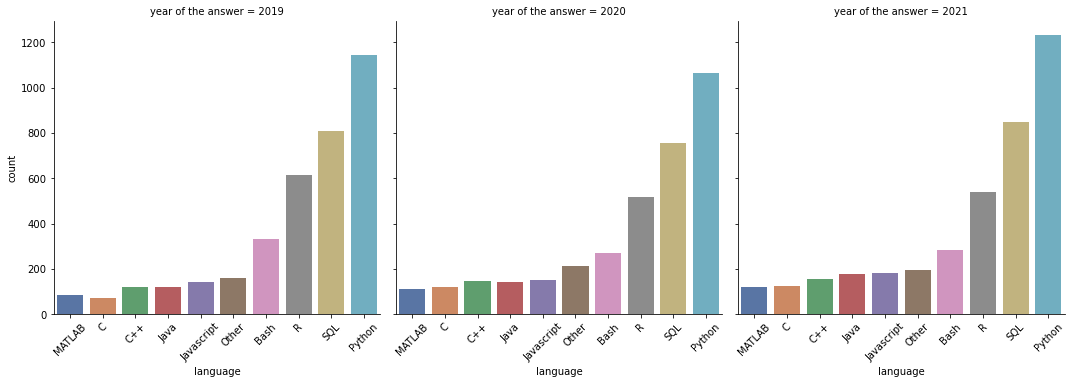

In [65]:
# Plot for top 5 programming language by senior Data Scientists all three years

# df.columns.get_loc('What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python')
# # => 65
# df.columns.get_loc('What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB')
# # => 74
plot1_q = df.iloc[:, 65:75]

plot1 = pd.melt(df_ppl_grp, id_vars=['year of the answer'], value_vars= plot1_q.columns, value_name='language')

plot1.dropna(inplace=True)

cat = sns.catplot(kind="count", col="year of the answer", x="language",
            order=plot1["language"].value_counts().sort_values().index, 
            data=plot1,
            palette='deep'
           )
for i in cat.axes:
    for j in i:
        j.set_xticklabels(j.get_xticklabels(), rotation=45)
plt.savefig("plot1_language.png", bbox_inches='tight')


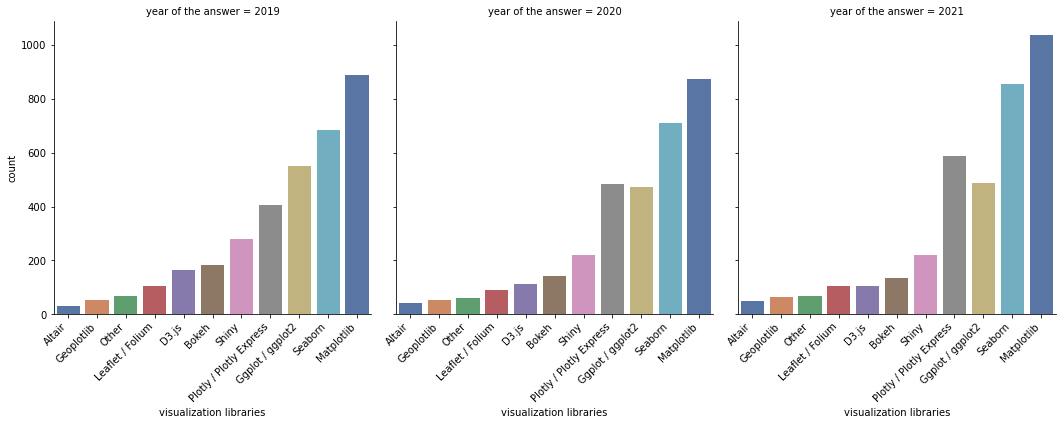

In [66]:
# Plot for top 5 visualisation libraries/tools by senior Data Scientists all three years

# df.columns.get_loc('What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2')
# => 77
# df.columns.get_loc('What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - None')
# => 87
plot2_q = df.iloc[:, 77:87]

plot2 = pd.melt(df_ppl_grp, id_vars=['year of the answer'], value_vars= list(plot2_q.columns) + ['What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'], value_name='visualization libraries')

plot2.dropna(inplace=True)

cat = sns.catplot(kind="count", col="year of the answer", x="visualization libraries",
            order=plot2["visualization libraries"].value_counts().sort_values().index, 
            data=plot2, 
            palette='deep'
                 )
for i in cat.axes:
    for j in i:
        j.set_xticklabels(j.get_xticklabels(), rotation=45, ha='right')
# cat.fig.suptitle('Top 5 visualisation libraries by senior data scientists from 2019 to 2021') #ugly so unused :(
plt.savefig("plot2_visualisation.png", bbox_inches='tight')



In [68]:
# Plot for top 5 programming language by senior Data Scientists all three years
# transforming the dataset for barplot
# df_plot_1 = df.groupby(['sex', 'class']).agg(
#     avg_age=('age', 'mean'), count=('sex', 'count'))

# data_df = data_df.reset_index()

In [ ]:
# df['What is your gender? - Selected Choice'].value_counts()

In [ ]:
# Drop all data with 'Prefer not to say', 'Nonbinary' and 'Prefer to self-describe' becuase of insufficiency of data
# df_gen = df[(df['What is your gender? - Selected Choice'] != 'Prefer to self-describe') & (df['What is your gender? - Selected Choice'] != 'Prefer not to say')& (df['What is your gender? - Selected Choice'] != 'Nonbinary')]

# df_gen['What is your gender? - Selected Choice'].unique()


In [ ]:
# sns.catplot(x="What is your current yearly compensation (approximate $USD)?",
#             kind="count", 
# #             order = df['passengers'],
#             data=df,
#             hue='What is your gender? - Selected Choice',
#             height=5,
#             aspect=1.5)
# plt.xlabel("Number of Passengers Travelled", size=14)
# plt.ylabel("Count", size=14)
# plt.title("Seaborn Barplot Example: Decending order", size=18)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig("Seaborn_barplot_with_reordering_bars_catplot.png")
